# Tutorial meh

Bla bla bla $\frac{1}{\psi}$

In [ ]:
%matplotlib inline

In [1]:
from fatiando import mesher, gridder
from fatiando.gravmag import prism
from fatiando.vis import mpl, myv
from IPython.display import Image

In [2]:
model = [mesher.Prism(-4000, -3000, -4000, -3000, 0, 2000, {'density': 1000}),
         mesher.Prism(-1000, 1000, -1000, 1000, 0, 2000, {'density': -900}),
         mesher.Prism(2000, 4000, 3000, 4000, 0, 2000, {'density': 1300})]
shape = (100, 100)
xp, yp, zp = gridder.regular((-5000, 5000, -5000, 5000), shape, z=-150)
fields = [prism.potential(xp, yp, zp, model),
          prism.gx(xp, yp, zp, model),
          prism.gy(xp, yp, zp, model),
          prism.gz(xp, yp, zp, model),
          prism.gxx(xp, yp, zp, model),
          prism.gxy(xp, yp, zp, model),
          prism.gxz(xp, yp, zp, model),
          prism.gyy(xp, yp, zp, model),
          prism.gyz(xp, yp, zp, model),
          prism.gzz(xp, yp, zp, model)]
print(shape)

(100, 100)


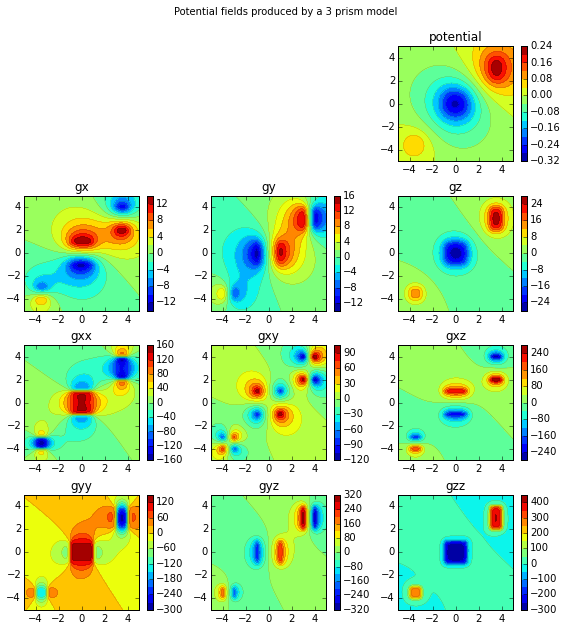

In [3]:
titles = ['potential', 'gx', 'gy', 'gz',
          'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
mpl.figure(figsize=(8, 9))
mpl.subplots_adjust(left=0.03, right=0.95, bottom=0.05, top=0.92, hspace=0.3)
mpl.suptitle("Potential fields produced by a 3 prism model")
for i, field in enumerate(fields):
    mpl.subplot(4, 3, i + 3)
    mpl.axis('scaled')
    mpl.title(titles[i])
    levels = mpl.contourf(yp * 0.001, xp * 0.001, field, shape, 15)
    cb = mpl.colorbar()
    mpl.contour(yp * 0.001, xp * 0.001, field, shape,
                levels, clabel=False, linewidth=0.1)    

/home/leo/bin/anaconda/lib/python2.7/site-packages/mayavi/preferences/preference_manager.py:24: UserWarning: Module fatiando was already imported from /home/leo/src/fatiando/fatiando/__init__.pyc, but /home/leo/bin/anaconda/lib/python2.7/site-packages is being added to sys.path
  import pkg_resources


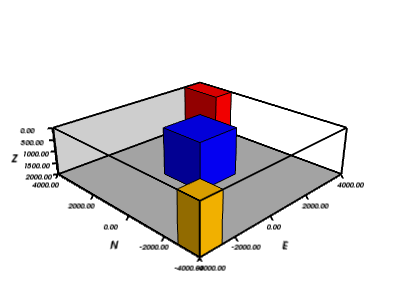

In [4]:
myv.figure()
myv.prisms(model, prop='density')
axes = myv.axes(myv.outline())
myv.wall_bottom(axes.axes.bounds, opacity=0.2)
myv.wall_north(axes.axes.bounds)
myv.savefig('tmp.png')
myv.mlab.close()
Image(filename='tmp.png')